In [134]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Amp Parameters
D = 0.1  # Diffusion coefficient
k = 0.01  # Chemotaxis coefficient
dt = 0.1  # Time step
T = 1.0  # Total simulation time
N = 100  # Number of grid points in each dimension
h = 100 / N  # Grid spacing
decay = 0.01  # Decay rate

# Cell Parameters
Dc = 0.1  # Diffusion coefficient
kc = 0.5  # Chemotaxis coefficient
grow = 0.0  # Growth rate
dtc = 0.1  # Time step
hc = 100 / N  # Grid spacing
chemotaxis=0.5  # Chemotaxis coefficient

# Initialize the grid
x = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, x)
u = np.zeros((N, N))  # Chemical concentration
v = np.ones((N, N))  # Cell density

# Add antibiotics at the center of the plate
center = N//2
radius = N // 25
# central circle area of u is 1.0
for i in range(len(u)):
    for j in range(len(u)):
        if (i-center)**2 + (j-center)**2 <= radius**2:
            u[i,j] = 10.0
# u[center-radius:center+radius, center-radius:center+radius] = 1.0

#u=bound(u)
v=bound(v)

In [106]:
# initiation of boudary
def bound(data):
    data[0,:] = np.ones(len(data))
    data[:,0] = np.ones(len(data))
    data[len(data)-1,:] = np.ones(len(data))
    data[:,len(data)-1] = np.ones(len(data))
    return data

In [114]:
# initiation of boudary
def bound_0(data):
    data[0,:] = np.zeros(len(data))
    data[:,0] = np.zeros(len(data))
    data[len(data)-1,:] = np.zeros(len(data))
    data[:,len(data)-1] = np.zeros(len(data))
    return data

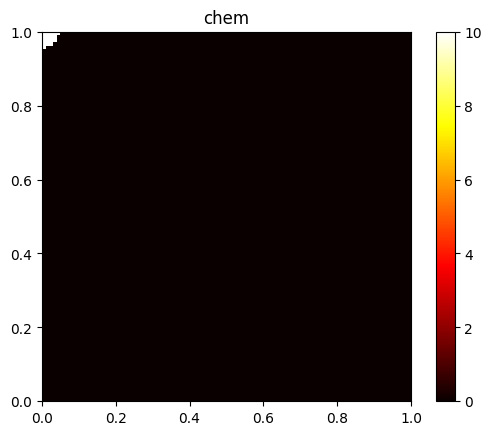

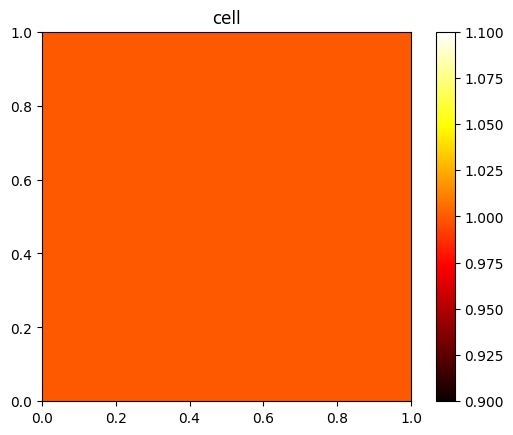

In [126]:
# test the initiation
plot_img(u,"chem")
plot_img(v,"cell")

In [3]:
# plot data
def plot_img(data, title):
    plt.imshow(data, cmap='hot', extent=[0, 1, 0, 1])
    plt.colorbar()
    plt.title(title)
    plt.show()

In [98]:
# laplacian
def laplacian(data, h):
    #lapl = np.roll(data, 1, axis=0) + np.roll(data, -1, axis=0) + \
    #             np.roll(data, 1, axis=1) + np.roll(data, -1, axis=1) - 4 * data
    #lapl /= h**2

    lapl = np.zeros(data.shape)
    for i in range(1,len(data)-1):
        for j in range(1,len(data)-1):
            lapl[i,j] = (data[i+1,j] + data[i-1,j] + data[i,j+1] + data[i,j-1] - 4 * data[i,j]) / h**2

    return lapl

In [124]:
# new laplacian 
def laplacian_2(data, h):
    lapl = np.roll(data, 1, axis=0) + np.roll(data, -1, axis=0) + \
                 np.roll(data, 1, axis=1) + np.roll(data, -1, axis=1) - 4 * data
    lapl /= h**2

    return lapl

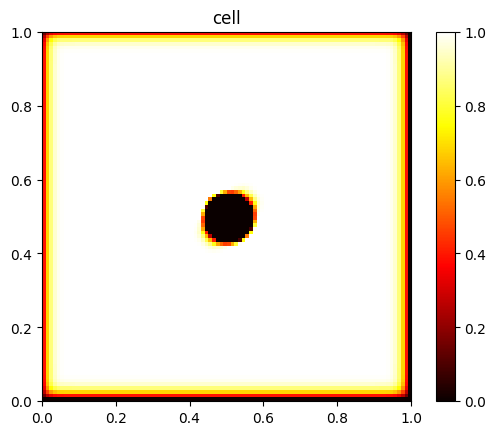

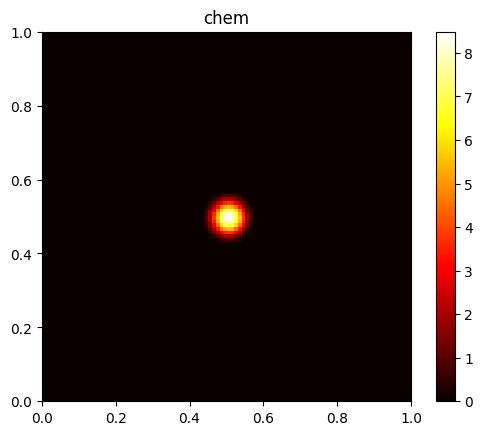

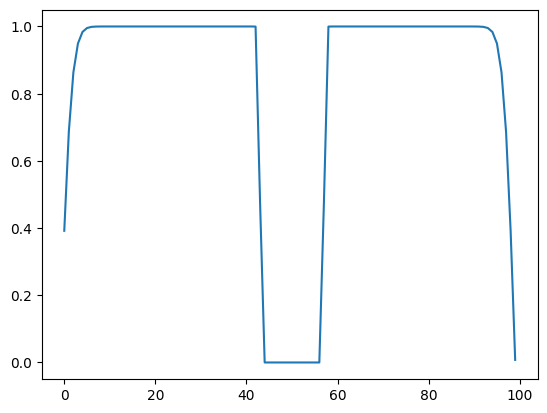

In [136]:
# Simulation loop
for step in range(10):

    for t in np.arange(0, T, dt):
        laplacian_u = laplacian_2(u, h)
        delta_u = D * laplacian_u
        # loop through u
        for i in range(len(u)):
            for j in range(len(u)):
                u[i,j] -= decay * v[i,j]
                if u[i,j]<0:
                    u[i,j] = 0
        u += dt * delta_u

        alpha = 25
        laplacian_v = laplacian_2(v, hc)
        x,y=np.gradient(u)
        x2,y2=np.gradient(v*(x+y))
        # delta=D*△v+chemotaxis*▽(v▽u)+g(u,v)
        delta_v = Dc * laplacian_v + chemotaxis*(x2+y2)
        v += dtc * delta_v

        for i in range(len(v)):
            for j in range(len(v)):
                if v[i,j] > 1:
                    v[i,j] = 1

    for i in range(len(v)):
        for j in range(len(v)):
            if v[i,j] > 0:
                v[i,j] = v[i,j] - kc * u[i,j]
            if v[i,j] < 0:
                v[i,j] = 0
            

plot_img(v, 'cell')
plot_img(u, 'chem')
plt.plot(v[50,])
plt.show()




[[1.85807376 1.85807376 1.85807376 ... 1.85807376 1.85807376 1.85807376]
 [1.85807376 1.85807376 1.85807376 ... 1.85807376 1.85807376 1.85807376]
 [1.85807376 1.85807376 1.85807376 ... 1.85807376 1.85807376 1.85807376]
 ...
 [1.85807376 1.85807376 1.85807376 ... 1.85807376 1.85807376 1.85807376]
 [1.85807376 1.85807376 1.85807376 ... 1.85807376 1.85807376 1.85807376]
 [1.85807376 1.85807376 1.85807376 ... 1.85807376 1.85807376 1.85807376]]


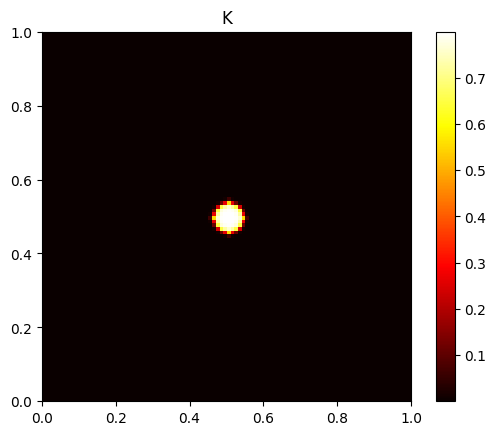

In [311]:
print(v)
plot_img(K,"K")

[1.03740696 1.03740614 1.03740365 1.03739937 1.03739309 1.03738452
 1.03737326 1.0373588  1.03734048 1.03731749 1.03728885 1.03725335
 1.03720951 1.03715556 1.03708935 1.03700833 1.03690939 1.03678886
 1.03664229 1.03646442 1.0362489  1.03598821 1.03567331 1.03529343
 1.03483566 1.03428455 1.03362158 1.03282451 1.03186656 1.0307154
 1.02933197 1.02766882 1.02566819 1.02325948 1.02035598 1.0168508
 1.01261164 1.00747502 1.00124285 0.993695   0.98466509 0.97431673
 0.9639368  0.95775366 0.96602168 1.00784801 1.10845284 1.28328682
 1.51015689 1.71360623 1.79674096 1.71360623 1.51015689 1.28328682
 1.10845284 1.00784801 0.96602168 0.95775366 0.9639368  0.97431673
 0.98466509 0.993695   1.00124285 1.00747502 1.01261164 1.0168508
 1.02035598 1.02325948 1.02566819 1.02766882 1.02933197 1.0307154
 1.03186656 1.03282451 1.03362158 1.03428455 1.03483566 1.03529343
 1.03567331 1.03598821 1.0362489  1.03646442 1.03664229 1.03678886
 1.03690939 1.03700833 1.03708935 1.03715556 1.03720951 1.03725335

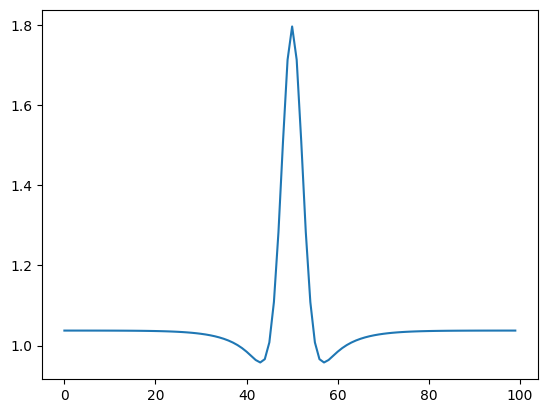

In [575]:
print(v[50,])
# plot v[50,]
plt.plot(v[50,])
plt.show()

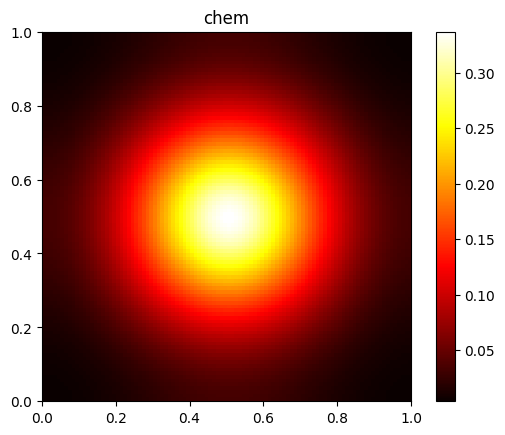

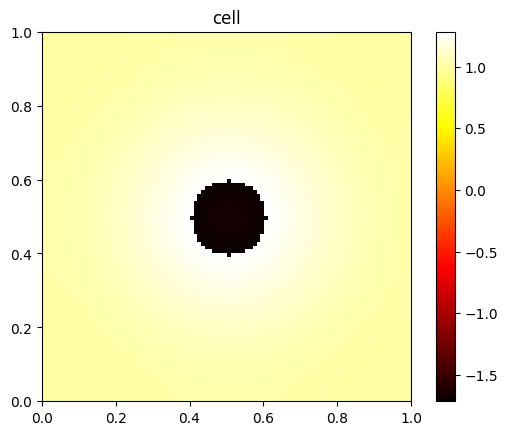

In [48]:
# (old version) Simulation loop
for t in np.arange(0, T, dt):
    # Laplacian of u
    laplacian_u = laplacian(u, h)
    laplacian_v = laplacian(v, hc)
    
    # Update u and v
    u += dt * (D * laplacian_u - k * u * v)
    v += dt * (Dc* laplacian_v - kc * u * v)

plot_img(u, 'chem')
plot_img(v, 'cell')